In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sportininkai = pd.read_csv("athlete_events.csv")
salys = pd.read_csv("noc_regions.csv")
                  

In [3]:
bendras = pd.merge(sportininkai, salys, on="NOC", how="left")

In [4]:
bendras.set_index("ID", inplace=True)

In [18]:
bendras.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
bendras.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [6]:
auksoMedaliai = bendras[(bendras.Medal == 'Gold')]

In [7]:
auksoMedaliai.describe()

,Age,Height,Weight,Year
count,13224.000000,10539.000000,10254.000000,13372.000000
mean,25.901013,177.898472,74.183879,1973.131618
std,5.892887,11.052521,15.207425,34.179153
min,13.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,63.000000,1952.000000
50%,25.000000,178.000000,73.000000,1984.000000
75%,29.000000,185.000000,84.000000,2002.000000
max,64.000000,223.000000,170.000000,2016.000000


In [8]:
auksoMedaliai.isnull().any()

Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [9]:
auksoMedaliai_beNaN = auksoMedaliai[np.isfinite(auksoMedaliai['Age'])]

In [10]:
auksoMedaliai_beNaN.isnull().any()

Name      False
Sex       False
Age       False
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

Text(0.5, 1.0, 'Aukso medalių pasiskirstymas amžių grupėje')

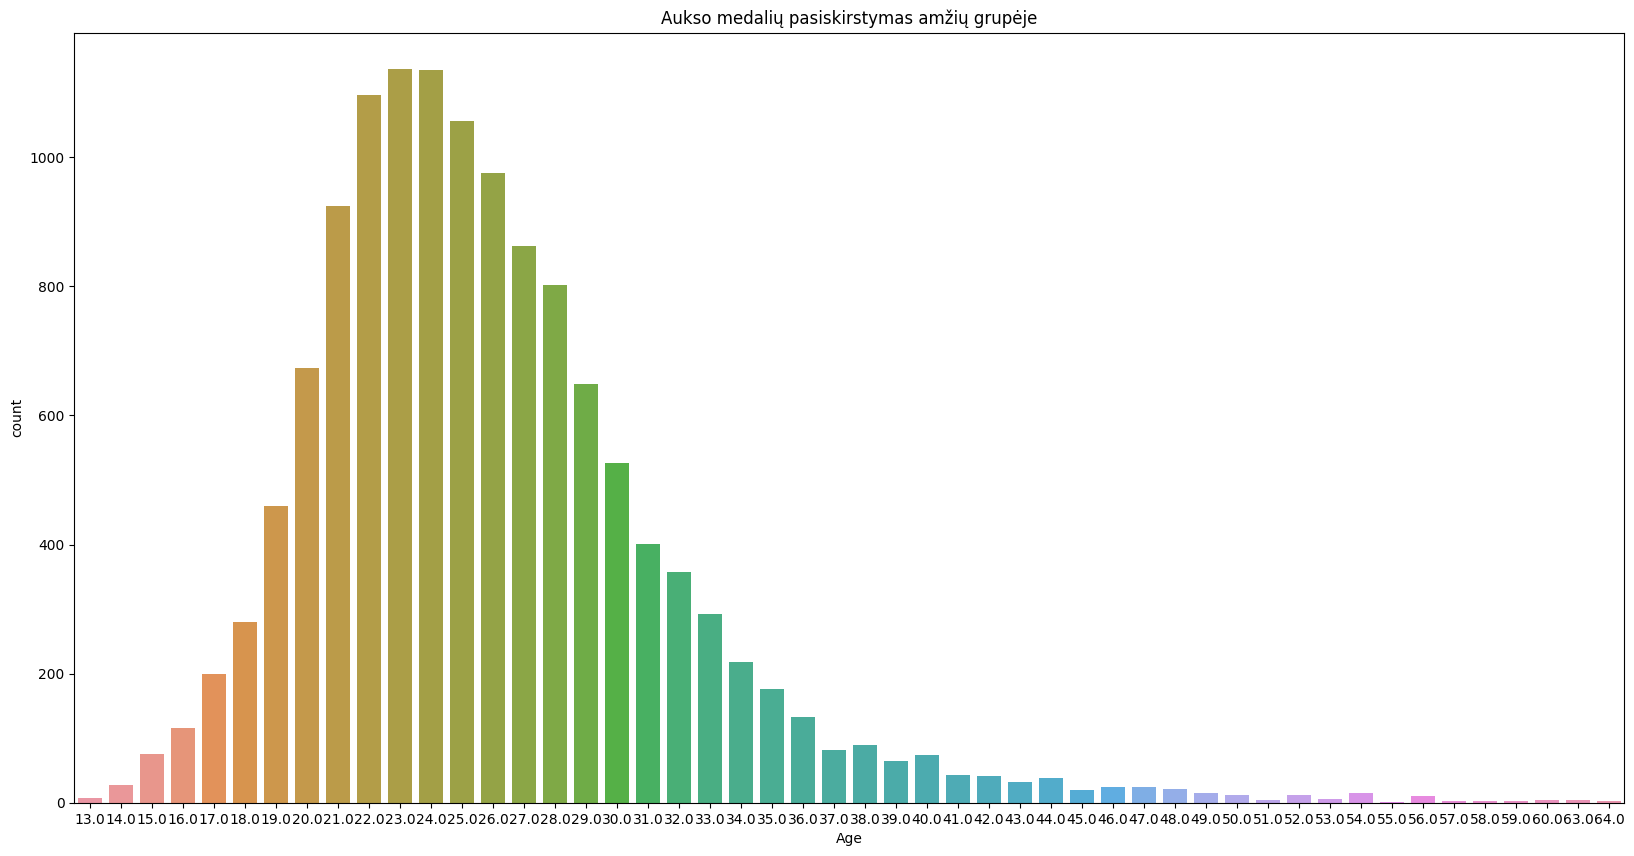

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot(data=auksoMedaliai, x='Age')
plt.title('Aukso medalių pasiskirstymas amžių grupėje')

In [12]:
auksoMedaliai_beNaN.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [13]:
vyresni_nei_50_auksas = (auksoMedaliai_beNaN["Age"]>50).sum()
vyresni_nei_50_auksas

65

Text(0.5, 1.0, 'Rungtys. Auksas. Amžius > 50')

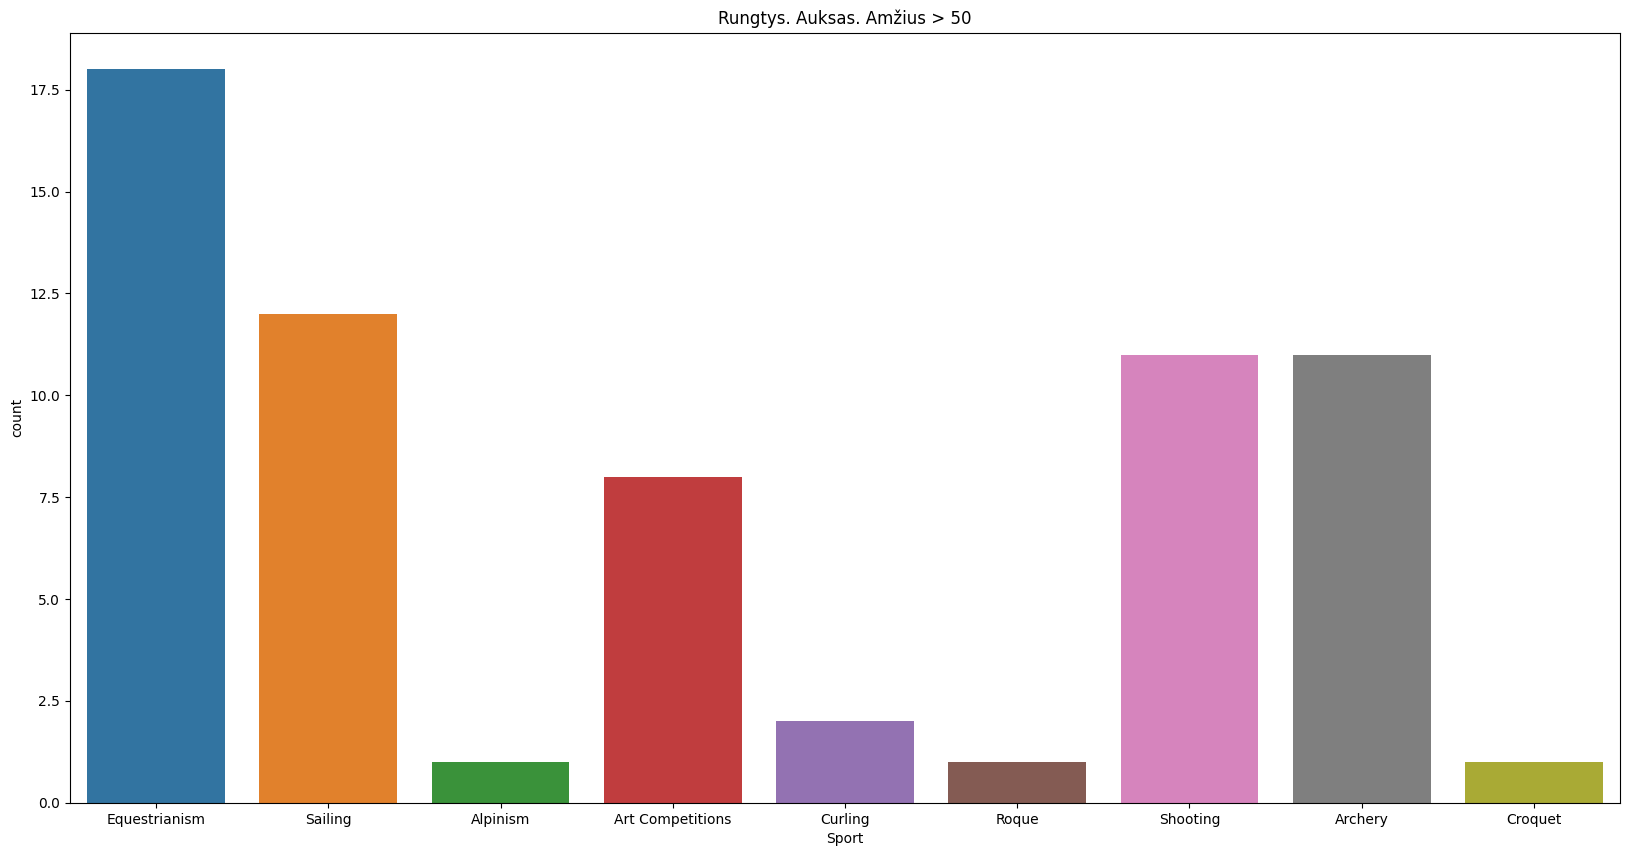

In [14]:
sportas_vyresni_nei_50 = auksoMedaliai_beNaN["Sport"][auksoMedaliai_beNaN["Age"]>50]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=auksoMedaliai_beNaN, x=sportas_vyresni_nei_50)
plt.title("Rungtys. Auksas. Amžius > 50")


Text(0.5, 1.0, 'Metai. Auksas. Amžius > 50')

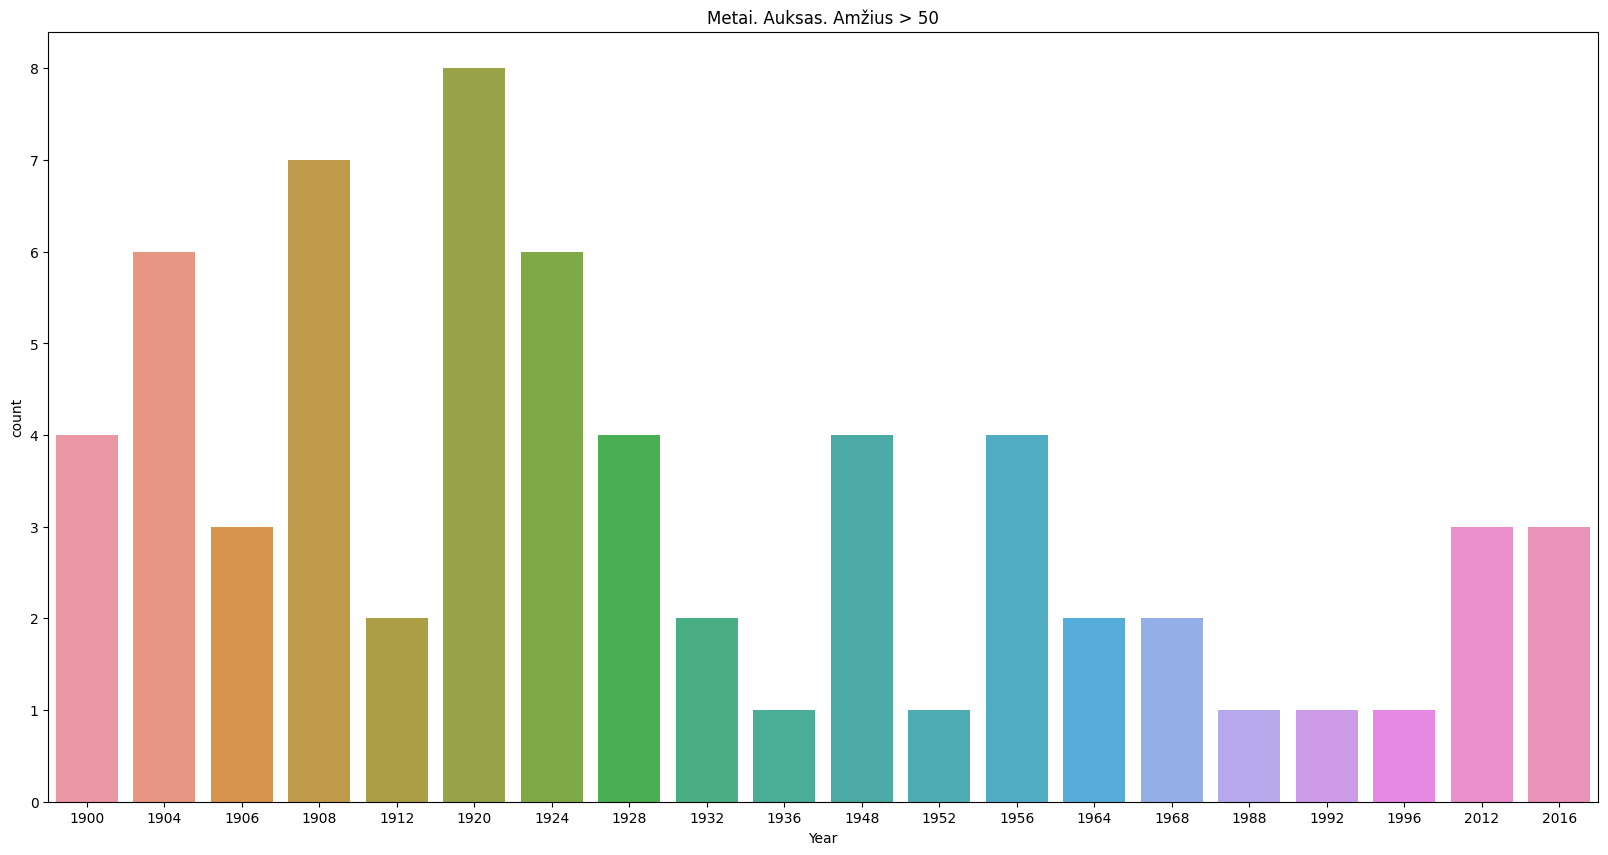

In [15]:
sportas_vyresni_nei_50 = auksoMedaliai_beNaN["Year"][auksoMedaliai_beNaN["Age"]>50]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=auksoMedaliai_beNaN, x=sportas_vyresni_nei_50)
plt.title("Metai. Auksas. Amžius > 50")


In [16]:
jaunesni_nei_18_auksas = (auksoMedaliai_beNaN["Age"] <= 18).sum()
jaunesni_nei_18_auksas

704

In [17]:
 = auksoMedaliai_beNaN['Sport'][auksoMedaliai_beNaN['Age']<=18]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=auksoMedaliai_beNaN, x=sportas_jaunesni_nei_18)
plt.title("Rungtys. Auksas. Amžius <=18")
plt.xticks(rotation=90) 

SyntaxError: invalid syntax (435371828.py, line 1)

Text(0.5, 1.0, 'Metai. Auksas. Amžius <= 18')

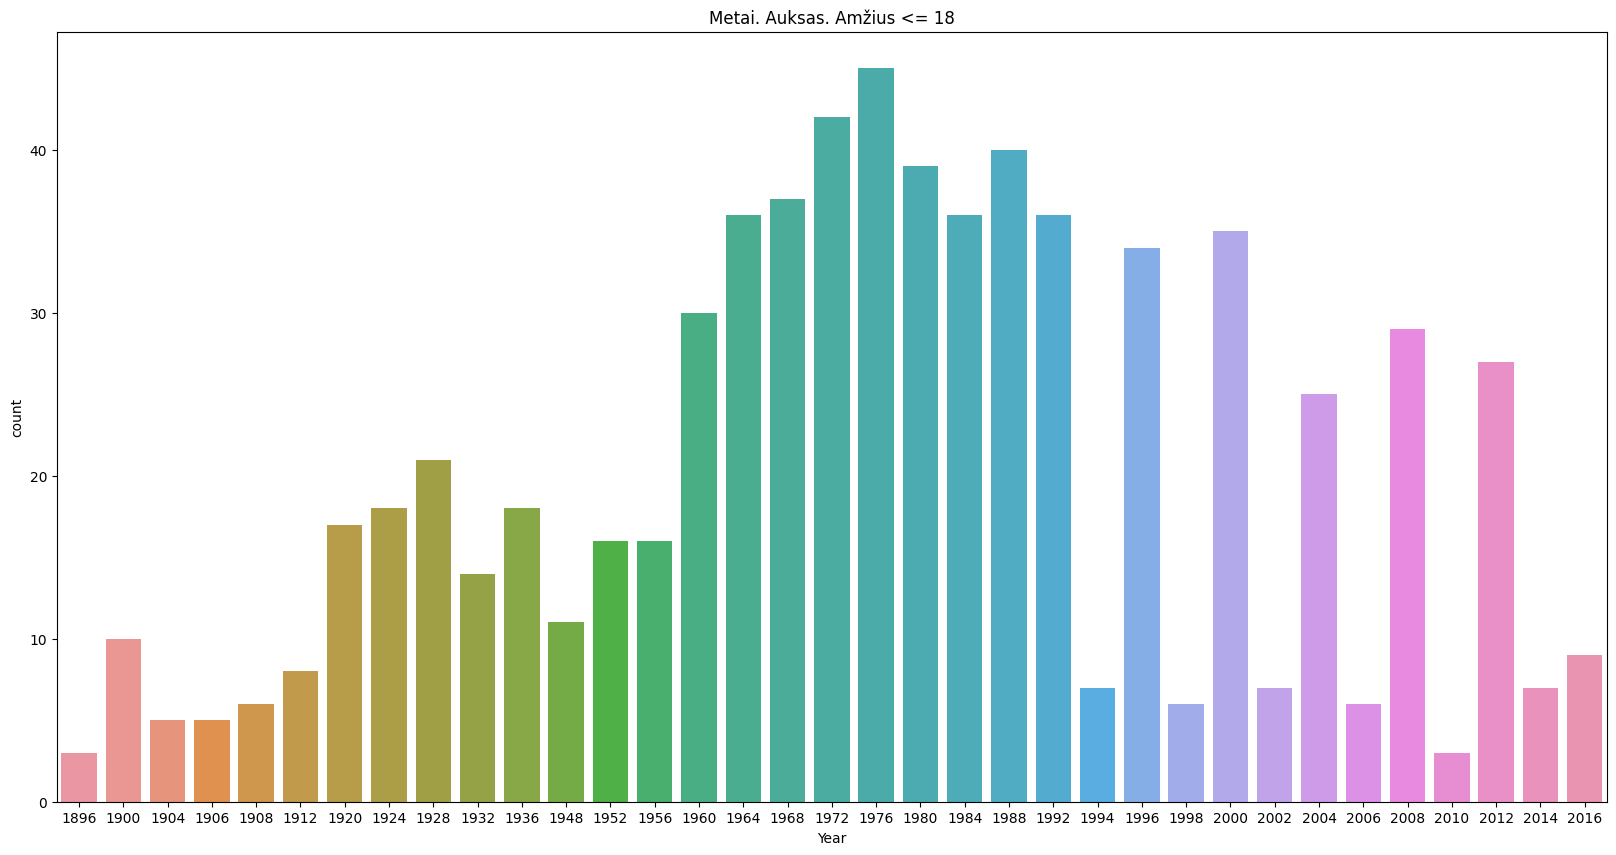

In [ ]:
sportas_jaunesni_nei_18 = auksoMedaliai_beNaN["Year"][auksoMedaliai_beNaN["Age"]<=18]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=auksoMedaliai_beNaN, x=sportas_jaunesni_nei_18)
plt.title("Metai. Auksas. Amžius <= 18")

Text(0, 0.5, 'Aukso medaliai')

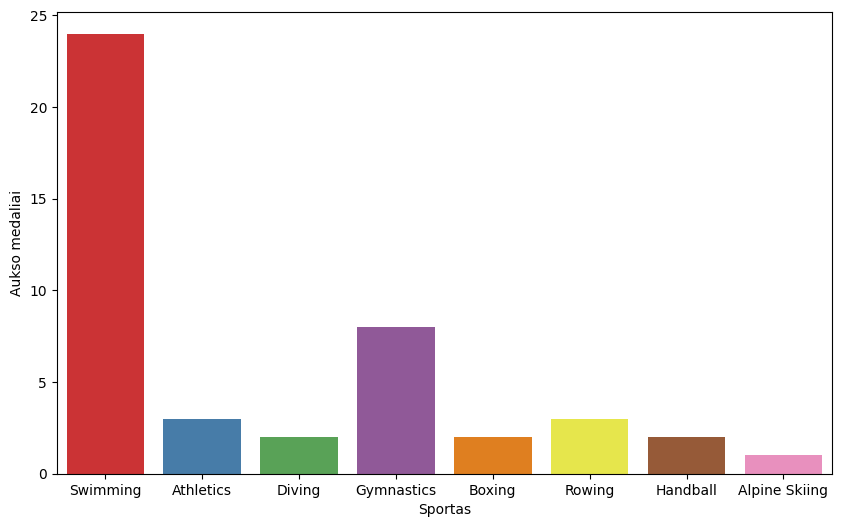

In [ ]:
jaunesni_nei_18_max = auksoMedaliai_beNaN[(auksoMedaliai_beNaN['Year'] == 1976) & (auksoMedaliai_beNaN['Age'] <=18)]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=jaunesni_nei_18_max, x='Sport', palette='Set1')
plt.xlabel('Sportas')
plt.ylabel('Aukso medaliai')



In [ ]:
auksoMedaliai_beNaN.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

Text(0.5, 1.0, 'filtruota_plaukimas_jaunesni18')

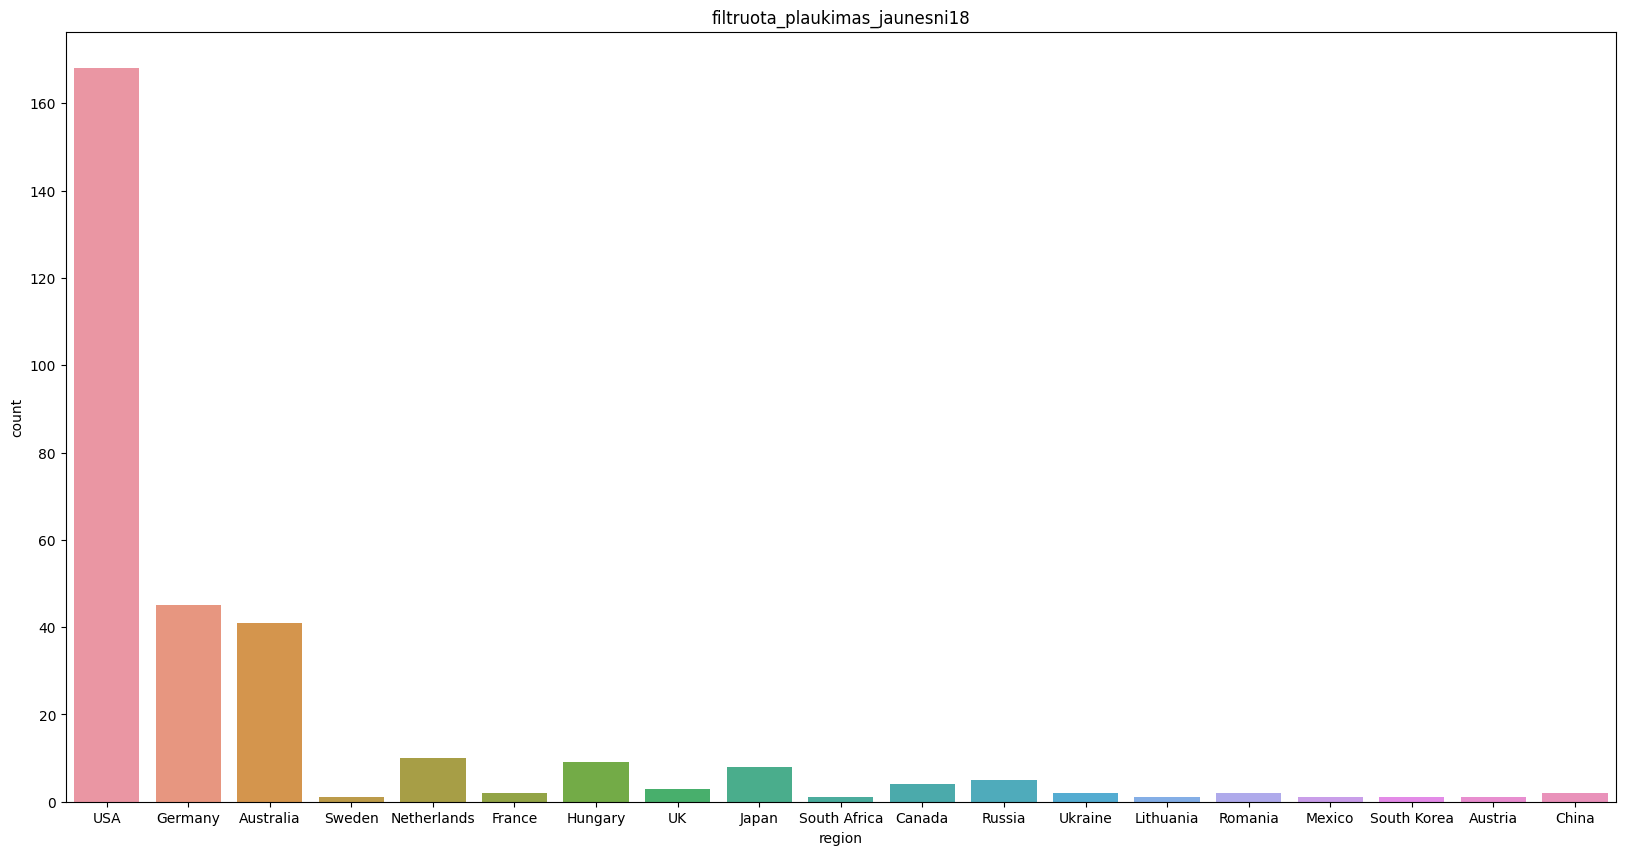

In [ ]:
filtruota_plaukimas_jaunesni18 = auksoMedaliai_beNaN[(auksoMedaliai_beNaN['Sport'] == 'Swimming') & (auksoMedaliai_beNaN['Age'] <= 18)]
plt.figure(figsize = (20, 10))
plt.tight_layout()
sns.countplot(data=filtruota_plaukimas_jaunesni18, x='region')
plt.title("filtruota_plaukimas_jaunesni18")


In [ ]:
filtruota_plaukimas_jaunesni18_LT = auksoMedaliai_beNaN[(auksoMedaliai_beNaN['Sport'] == 'Swimming') & (auksoMedaliai_beNaN['Age'] <= 18) & (auksoMedaliai_beNaN['region'] == 'Lithuania')]
filtruota_plaukimas_jaunesni18_LT


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
78271,Rta Meilutyt,F,15.0,176.0,75.0,Lithuania,LTU,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 100 metres Breaststroke,Gold,Lithuania,NaN


In [ ]:
filtruota_LT = auksoMedaliai_beNaN[(auksoMedaliai_beNaN['region'] == 'Lithuania')]
filtruota_LT

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
2469,Virgilijus Alekna,M,28.0,200.0,130.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN
2469,Virgilijus Alekna,M,32.0,200.0,130.0,Lithuania,LTU,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN
5453,Laura Asadauskait-Zadneprovskien,F,28.0,160.0,49.0,Lithuania,LTU,2012 Summer,2012,Summer,London,Modern Pentathlon,Modern Pentathlon Women's Individual,Gold,Lithuania,NaN
43522,Daina Gudzineviit,F,34.0,178.0,76.0,Lithuania,LTU,2000 Summer,2000,Summer,Sydney,Shooting,Shooting Women's Trap,Gold,Lithuania,NaN
78271,Rta Meilutyt,F,15.0,176.0,75.0,Lithuania,LTU,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 100 metres Breaststroke,Gold,Lithuania,NaN
123034,Romas Ubartas,M,32.0,203.0,120.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Discus Throw,Gold,Lithuania,NaN


In [ ]:
bendras_vėliausi_metai = bendras['Year'].max()
bendras_vėliausi_metai

2016

In [ ]:
bendras_filtruota_pagalLT = bendras[(bendras['region'] == 'Lithuania') & (bendras['Year'] == 2016)]
bendras_filtruota_pagalLT_tikMedaliai = bendras_filtruota_pagalLT.dropna(subset = ['Medal'])
bendras_filtruota_pagalLT_tikMedaliai


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
28400,Aurimas Didbalis,M,25.0,172.0,94.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middle-Heavyweight,Bronze,Lithuania,NaN
43037,Mindaugas Grikonis,M,30.0,190.0,92.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Double Sculls,Silver,Lithuania,NaN
66534,Aurimas Lankas,M,30.0,178.0,89.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 200 metres",Bronze,Lithuania,NaN
98590,Edvinas Ramanauskas,M,30.0,184.0,90.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 200 metres",Bronze,Lithuania,NaN
101070,Saulius Ritter,M,27.0,202.0,110.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Double Sculls,Silver,Lithuania,NaN
123871,Milda Valiukait,F,22.0,176.0,66.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Double Sculls,Bronze,Lithuania,NaN
126862,Donata Vitartait,F,27.0,170.0,62.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Double Sculls,Bronze,Lithuania,NaN
